### Задачи
<ol>
<li>Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.</li>
<li>Какой клиент совершил больше всего успешных операций? (success == True)</li>
<li>С какой платформы осуществляется наибольшее количество успешных операций?</li>
<li>Какую платформу предпочитают премиумные клиенты?</li>
<li>Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)</li>
<li>Постройте график распределения числа успешных операций</li>
<li>Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?</li>
</ol>

#### Описание данных
user_data:
* client – идентификатор пользователя
* premium – является ли клиент премиум
* age – возраст

logs:
* client – идентификатор пользователя
* success – результат (успех - 1, нет - 0)
* platform – платформа
* time – время в формате Unix

In [1]:
# Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных из файла 3_user_data.csv
user_data = pd.read_csv('3_user_data.csv')

In [3]:
# Загрузка данных из файла 3_logs.csv
logs = pd.read_csv('3_logs.csv')

In [4]:
# Просмотр размера таблицы
user_data.shape

(2954, 3)

In [5]:
# Просмотр размера таблицы
logs.shape

(4500, 4)

In [6]:
# Просмотр типов данных колонок
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
# Просмотр типов данных колонок
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [8]:
# Проверка наличия пропущенных значения
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [9]:
# Проверка наличия пропущенных значения
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [10]:
# Просмотр описательных статистик числовых колонок
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
# Просмотр описательных статистик числовых колонок
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [12]:
# Количества уникальных платформ в таблице
logs.platform.nunique()

3

In [13]:
# Количество успешных операций для каждого пользователя
success_number = logs.query('success == True') \
                        .groupby('client', as_index=False) \
                        .success.count() \
                        .sort_values('success', ascending=False)

In [14]:
# Максимальное количество успешных операций
max_success_number = success_number.success.max()

In [15]:
# Список клиентов с числом успешных операций равных максимальному значению
client_success_number = success_number.query('success == @max_success_number').client.sort_values().tolist()

In [16]:
# Пребразование списка клиентов в строку
', '.join(str(client) for client in client_success_number)

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [17]:
# Платформа, с которой было совершено наибольшее число успешных операций
logs.query('success == True').platform.value_counts().idxmax()

'phone'

In [18]:
# Объединение таблиц в одну общую
full_data = logs.merge(user_data)

In [19]:
# Платформа, с которой было совершено наибольшее число успешных операций среди премиумных клиентов
full_data.query('premium == True').platform.value_counts().idxmax()

'phone'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


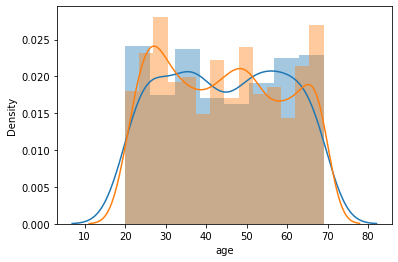

In [20]:
# Распределение возраста клиентов в зависимости от его типа (премиум или нет)
sns.distplot(full_data.query('premium == True').age);
sns.distplot(full_data.query('premium == False').age);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


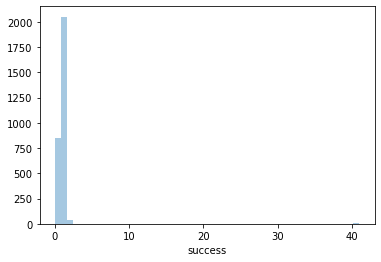

In [21]:
# Распределения числа успешных операций по количеству клиентов
sns.distplot(full_data.groupby('client').success.sum(), kde=False);

In [22]:
# Число клиентов, совершивших определенное количество успешных операций
full_data.groupby('client').success.sum().value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

In [23]:
# Успешные операции, совершенные с компьютера
success_computers = full_data.query('success == True and platform == "computer"')

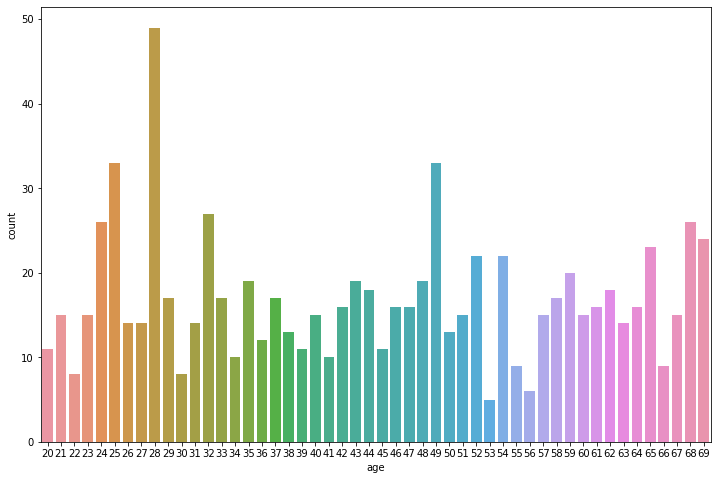

In [24]:
# Число успешные операции, совершенные с компьютера, в зависимости от возвраста клиента
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=success_computers);